# Homework 05

### Exercise 1 - Terminology

Describe the following terms with your own words:

***boolean array:*** an array (list) which only contains True and False values

***shape:*** a functions that gives us information on the dimensions of a numpy array

***axis:*** the dimensions of a numpy array

Answer the following questions:

***Which ways are there to select one or more elements from a Numpy array?***
* indexing/slicing (fancy indexing)
* functions (e.g. np.diag to get the diagonal elements)

***What is the difference between Numpy and Scipy?***
Numpy is used for efficient basic arithmetic operations on data stored in arrays. Numpy is written in C and thus calculations are faster than in base Python.
Scipy provides extended functionality for more complex mathematical operations, e.g. integration, differentiation

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Exercise 2 - Download data from entsoe-e for Lecture 6

For lecture 6, we need to download data from the Entso-e [transparency platform](https://transparency.entsoe.eu/): Entso-e provides (almost) real-time data on European electricity systems. We will download hourly load data (i.e. electricity demand) for all systems in Europe. First, you need to get a user account at Entsoe-e [here](https://transparency.entsoe.eu/usrm/user/createPublicUser). 

We are going to use the S-FTP server of Entso-e. To use S-FTP in Python, you have to install the package pysftp. You can do so here in the notebook by executing the following command (please be aware that this may take some time):

In [2]:
!conda install -c conda-forge pysftp --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Katharina\anaconda3\envs\scientific-computing

  added / updated specs:
    - pysftp


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         184 KB  conda-forge
    certifi-2020.4.5.1         |   py37hc8dfbb8_0         150 KB  conda-forge
    openssl-1.1.1g             |       he774522_0         5.7 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.1 MB

The following NEW packages will be INSTALLED:

  pysftp             conda-forge/noarch::pysftp-0.2.9-py_1
  python_abi         conda-forge/win-64::python_abi-3.7-1_cp37m

The following packages will be UPDATED:

  ca-certificates     pkgs/main::ca-certificates-2020.1.1-0 --> conda-forge::ca-certificates-2020.

Now we are ready to download the data. In principle, you simply have to fill out your account information (by setting ```USER``` and ```PWD```), decide where to put the data locally by assigning a path to a ```DOWNLOAD_DIR``` and run the 4 cells below. If the download directory does not exist, it will be created. The download will take some time, so you may want to run the script overnight. 

If the download fails at some point, you can restart it by simply executing the cell again. Files which are already downloaded will not be downloaded again. ***Hint:*** I had problems downloading to a directoy which was on a google drive - so if you run into an error message, which says ```OSError: size mismatch in get!``` you may want to choose a directory which is not on a google drive or possibly a dropbox. Also, this error may occur if your disk is full. 

In [206]:
import os
import pysftp

# if you want, you can modify this too, per default it will create a folder
# in the parant folder of the homework repository:
DOWNLOAD_DIR = '../../entsoe-data'

CATEGORIES = [
    'ActualTotalLoad'
]

In [207]:
# To avoid storing the user credentials in the public Github repository,
# these commands will ask you to enter them interactively:
from getpass import getpass
user = getpass('User for ENTSO-E API:')
pwd = getpass('Password for ENTSO-E API:')

User for ENTSO-E API:········
Password for ENTSO-E API:········


In [211]:
def download_entsoe_data(user, pwd, category, output_dir, server_uri='sftp-transparency.entsoe.eu'):
    """Download a dataset from ENTSO-E's transparency data sftp server.
    
    Contact ENTSO-E to receive login credentials:
    https://transparency.entsoe.eu/usrm/user/createPublicUser
    
    :param user: user name required for connecting with sftp server
    :param pwd: password required for connecting with sftp server
    :param category: ENTSO-E data category to be downloaded
    :param output_dir: directory where downloaded data is saved to, a separate 
        subdirectory is created for each category.
    :param server_uri: URI of ENTSO-E transparency server (default last updated on 2020-05-01)
    
    """
    abspath = os.path.abspath(output_dir)
    
    # check if local_dir exists and create if it doesn't
    if not os.path.exists(abspath):
        os.mkdir(abspath)
        print (f'Successfully created the directory {abspath} and using it for download')
    else:
        print (f'{abspath} exists and will be used for download')  

    print("\nCopy this path for other notebooks, e.g. the next lecture or homework:\n"
          f"DOWNLOAD_DIR = '{abspath}'\n")
        
    cnopts = pysftp.CnOpts()
    cnopts.hostkeys = None
    
    # connect to entsoe server via sFTP
    entsoe_dir = f'/TP_export/{category}'
   
    with pysftp.Connection(server_uri, username=user, password=pwd, cnopts=cnopts) as sftp:
        sftp.chdir(entsoe_dir)
        files_entsoe = sftp.listdir()
        to_download = list(files_entsoe)
        
        print(f'In total, {len(to_download)} files are going to be downloaded')
        
        # download files not on disk
        
        for file in to_download:
            print(f'Downloading file {file}...')
            
            dest_file = os.path.join(abspath, file)
            
            if not os.path.exists(dest_file):
                temp_file = os.path.join(abspath, f'{file}.partial')
                
                sftp.get(f'{entsoe_dir}/{file}', temp_file)
                
                os.rename(temp_file, dest_file)                   
                print(f'{file} downloaded successfully.')
                
            else:
                 print(f'{file} already present locally, skipping download.')
           
    sftp.close()
    print("All downloads completed")

In [ ]:
# download data...
for category in CATEGORIES:
    download_entsoe_data(user, pwd, category, DOWNLOAD_DIR)

**Privacy note:** If you don't want to publish the path to your repository on Github (it may contain your Windows user name for example), clear the output of the cell above before saving the Notebook! (In the menu via Cell -> Current outputs -> Clear.)

### Exercise 3 - Create a diagonal matrix

Create a matrix `m` with shape `(4, 4)` by using `np.zeros()` and set the 4 diagonal elements to `1` by using indexing using `np.arange()`. Do not use more two assign statements in total for this exercise!

Bonus: Find multiple ways to avoid calling `np.arange()` twice and analyze which is the best regarding readability, performance and memory usage!

Note: Normally you would use `np.diag()` to do this. You can also have a look into the code using `np.diag??`, but it's probably easier to write your own implementation (which might be less generic and slower, but way simpler).

In [214]:
# Creating the matrix m
m = np.zeros((4,4))

# Assigning 1 to the diagonal elements
diag_index = np.arange(0,4)
m[diag_index, diag_index] = 1
print(m)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [220]:
## Exercise 3 with numpy.diag
m_v2 = np.zeros((4,4))

np.diag(m_v2)

array([0., 0., 0., 0.])

### Exercise 4 - Invasion

Create a canvas using `np.zeros()` of shape `(8, 11)`. Then set the following elements to one using fancy slicing techniques:

 - Rows 4 and 5 completely.
 - In row 3 all elements except the first one.
 - In row 2 all elements except the first two ones.
 - The two elements defined by: `row_idcs, column_idcs = [0, 1], [2, 3]`
 - In row 6 the elements in column 0 and 2.
 - In row 7 all elements except the first three and the last three.
 
And then afterwards the following elements to zero:
 - The three elements defined by: `row_idcs, column_idcs = [3, 5, 7], [3, 1, 5]`

As a last step, set assign the content of the first five columns to the last five columns in reversed order. This can be done by using a `step=-1` and starting with 4, i.e. the first five columns in reversed order are indexed by `canvas[:, 4::-1]`.

Then plot the canvas using `plt.imshow()` with the parameter `cmap='gray'`!

**Hint:** it helps a lot to have all commands in one cell (including the `imshow()` command) and execute the cell often, to check the result.

**Note:** When ever the instruction says "first element" it is something like `x[0]`, because it refers to the first one in the array. If it is column 1 or row 1 it is `x[1]`, because it refers then to the index of the column/row.

**Note:** It is `canvas[row_index, column_index]`, so if you are thinking in x/y coordinates, it is `canvas[y, x]` and the y axis goes downwards.

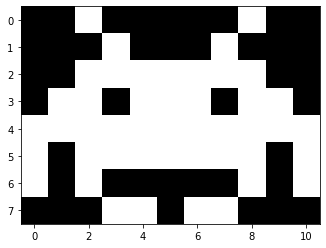

In [10]:
canvas = np.zeros((8,11))

# for me: row 4 = row with index 4, because two exercises explicitely mention row/column 0
# if row 4 means the 4th row, it would be index 3, 

### Setting elements to 1
# rows 4 and 5
canvas[4:6,:] = 1

# row 3 all elements except the first one
canvas[3, 1:] = 1

# row 2 all elements except the first two ones
canvas[2, 2:] = 1

# two elements defined by: row_idcs, column_idcs = [0, 1], [2, 3]
canvas[[0,1], [2,3]] = 1

#row 6 the elements in column 0 and 2.
canvas[6, [0,2]] = 1

#In row 7 all elements except the first three and the last three.
canvas[7, 3:-3] = 1

#print(canvas)


### Setting elements to 0
# The three elements defined by: row_idcs, column_idcs = [3, 5, 7], [3, 1, 5]
canvas[[3,5,7], [3,1,5]] = 0

#print(canvas)


### assign the content of the first five columns to the last five columns in reversed order
canvas[:,-5:] = canvas[:, 4::-1]

plt.imshow(canvas, cmap='gray')
plt.show()

### Exercise 5 - Draw a circle

Draw a full circle: first define a resolution e.g. $N=50$. Then define coordinates $x$ and $y$ using `np.linspace()` and pass the resolution as parameter `num=N`. Use `np.meshgrid()` to define a grid `xx` and `yy`. Define a canvas of shape `(N, N)` using `np.zeros()`. Then use the circle formula $x^2 + y^2 < r^2$ to define all circle points on the grid (use $r=2$). Then use the boolean 2D expression to set the inside of the circle to 1. Finally plot the canvas using `imshow()`.

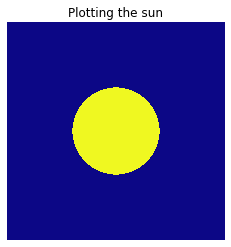

In [11]:
N = 500

# define coordinates
x_coord = np.linspace(-5, 5, N)
y_coord = np.linspace(-5, 5, N)

# circle center
#x_center, y_center = 5, 5 

# define grid
xx, yy = np.meshgrid(x_coord, y_coord)

canvas = np.zeros((N, N))

# radius
r = 2

# use circle formula x2 + y2 = r2 for boolean array
is_circle = xx**2 + yy**2 < r**2

canvas[is_circle] = 1

plt.imshow(canvas, cmap = "plasma")
plt.title("Plotting the sun")
plt.axis("off")
plt.show()

### Exercise 6 - Frequency of shades of gray

Convert the picture `numpy-meme.png` to gray scale and plot a histogram!

**Instructions:** Load the image by using `plt.imread()`. This will return a three dimensional array (width, height and colors) with values between zero and one. Using the formula `gray = red * 0.2125 + green * 0.7154 + blue * 0.0721`, convert the picture to shades of gray. Look at the shape of the image and pick the right axis by looking at the length of the array in this axis! You can first calculate a weighted version of the array by multiplying with a vector of length 3 (and the three weights) and then sum along the right axis. Check the shape of the gray image afterwards and plot it using `plt.imshow()` with the parameter `cmap='gray'`. It should be only two dimensional now. Use `image_gray.flatten()` to get all pixels as one-dimensional vector and pass this to the function `plt.hist()` with the parameter `bins=50` to get 50 bins with different gray values.

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
matplotlib.rc('figure', figsize=(15, 10))

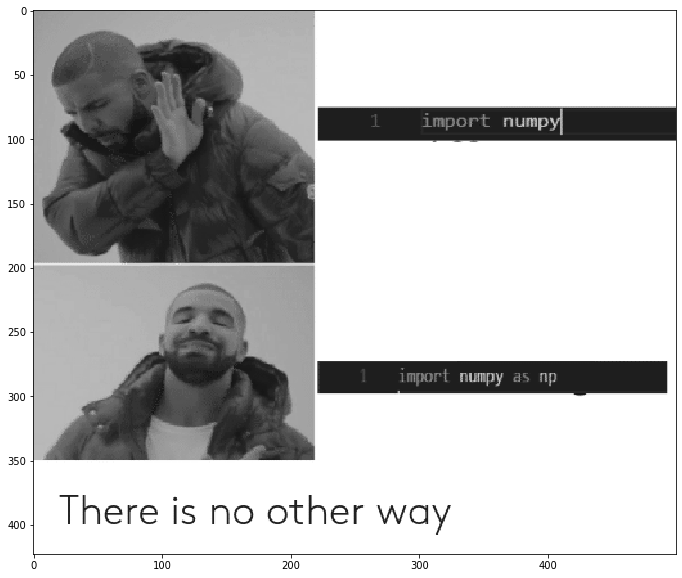

In [6]:
# Load image
image = plt.imread("numpy-meme.png")
image.shape # array has shape (423, 500, 3), i.e. 432 rows, 500 columns (432x500px) and 3 (color) values each

# change relative weights of rgb colors
#image_gray = np.dot(image[:,:,:3], [0.2125, 0.7154, 0.0721])
image_gray = image[:,:,:3] * [0.2125, 0.7154, 0.0721]
image_gray[:,:,:3] = np.sum(image_gray, 2, keepdims = True)

plt.imshow(image_gray, cmap=plt.get_cmap("gray"))
plt.show()


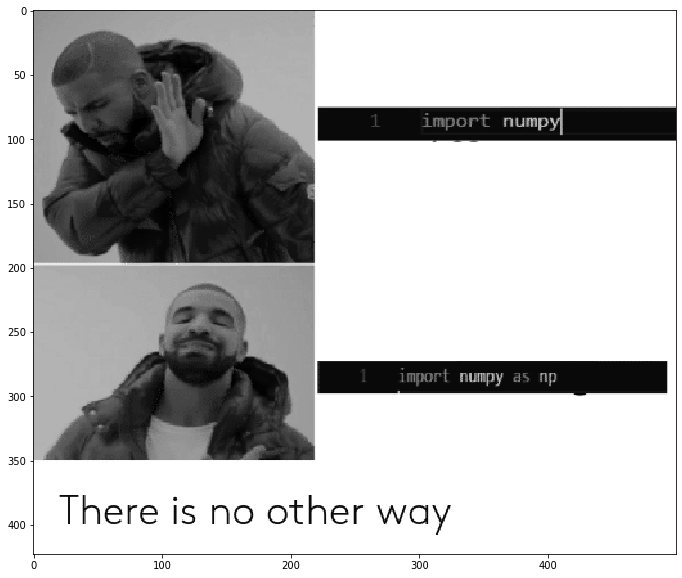

In [7]:
## Updated version 2020-05-11
# Load image
image = plt.imread("numpy-meme.png")
image.shape # array has shape (423, 500, 3), i.e. 432 rows, 500 columns (432x500px) and 3 (color) values each

# change relative weights of rgb colors
image_gray_v2 = image * [0.2125, 0.7154, 0.0721]
image_gray_v2 = np.sum(image_gray_v2, 2)

plt.imshow(image_gray_v2, cmap=plt.get_cmap("gray"))
plt.show()

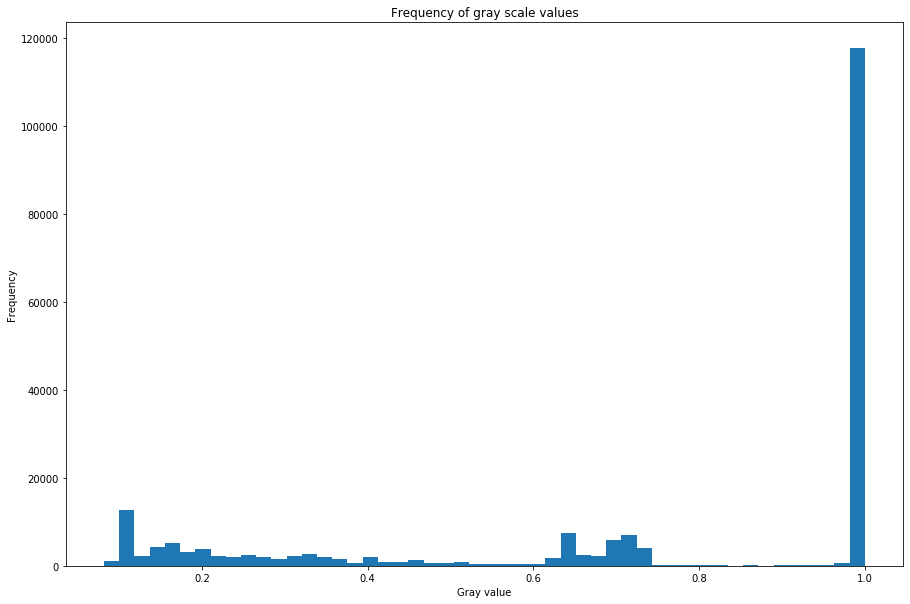

In [22]:
## Plot histogram
image_gray_1d = image_gray_v2.flatten()

plt.hist(image_gray_1d, bins = 50)
plt.xlabel("Gray value")
plt.ylabel("Frequency")
plt.title("Frequency of gray scale values")
plt.show()


### Exercise 7 - Count colors  (optional)

Calculate the number of colors used in the picture `numpy-meme.png` and the percentage of the color space (3 x 8bit, i.e. 256 values per color) used!

**Instructions:** Load the image by using `plt.imread()`. This will return a three dimensional array (width, height and colors) with values between zero and one. Multiplying the array with 255 will restore the original 8bit values (integer values between 0 and 255). After multiplying by 255 use `image = image.astype(int)` to convert the image to integer type. Plot the `image` using `plt.imshow()` to see the image and guess the result. Check the shape of the array. One of the axes is of length three - this is the color axis (red, green and blue). We want to map all colors to unique integers. This can be done by defining `colors = red  + green * 256 + blue * 256**2`. This is a unique mapping between the triples `(red, green, blue)` and the integers `color` similar to decimal digits (three values between 0 and 9 e.g. `(3, 5, 1)` can be mapped to a three digit number `3 + 5 * 10 + 1 * 100 = 153`). Then use `np.unique()` to get an array with unique colors (in the mapped form as in `color`). This can be used to determine the number of unique colors in the image. This value can also be used to calculate the percentage of the color space used.

<small>Image source: https://me.me/i/1-import-numpy-1-import-numpy-as-np-there-is-e4a6fb9cf75b413dbb3154794fd3d603</small>

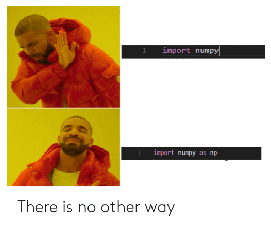

The picture has 258 different colors, which make up  60.99290780141844 % of all color points in the picture.
258 make up about 0.0015 % of the total RGB color space.


In [66]:
# Load image
image = plt.imread("numpy-meme.png")
image.shape # array has shape (423, 500, 3), i.e. 432 rows, 500 columns (432x500px) and 3 (color) values each

# restore original 8bit values
image = image * 255

# convert to integer type
image = image.astype(int)
#image[1,1,:]

plt.imshow(image)
plt.axis("off")
plt.show()

# Mapp colors to integer
colors_int = image[:,:,0] + image[:,:,1] * 256 + image[:, :,2] * 256**2
colors_unique = np.unique(colors_int)
#colors.shape # now (423, 500) -> one value per pixel

## Calculate the share
color_space = (2**8)**3
share_colors = len(colors_unique) / len(colors_int) * 100
share_color_space = len(colors_unique) / color_space * 100

# share_colors
print("The picture has", str(len(colors_unique)), "different colors, which make up ", share_colors, "% of all color points in the picture.")
print(str(len(colors_unique)), "make up about", round(share_color_space, 4), "% of the total RGB color space.")

Inspired by [this exercise](https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises_with_solutions.md#66-considering-a-wh3-image-of-dtypeubyte-compute-the-number-of-unique-colors-) (MIT licensed, [DOI](https://zenodo.org/badge/latestdoi/10173/rougier/numpy-100))